In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
import pathlib
import shutil

# Define the path to your local dataset directory
local_dataset_path = "Agricultural-crops"  # Replace this with the path to your dataset directory

# Update the data_dir variable to the local dataset path
data_dir = pathlib.Path(local_dataset_path)

# Check if the dataset needs to be extracted (if it's compressed)
if data_dir.suffix == '.tar':  # Assuming the dataset is in .tar format
    shutil.unpack_archive(data_dir, extract_dir=data_dir.parent)
    data_dir = data_dir.parent / data_dir.stem  # Update data_dir to the extracted directory

# The dataset is now ready for use in the data_dir variable

#data_dir = tf.keras.utils.get_file('Agricultural-crops.tar', origin=data_dir, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

560


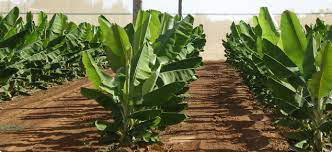

In [7]:
banana = list(data_dir.glob('banana/*'))
PIL.Image.open(str(banana[0]))

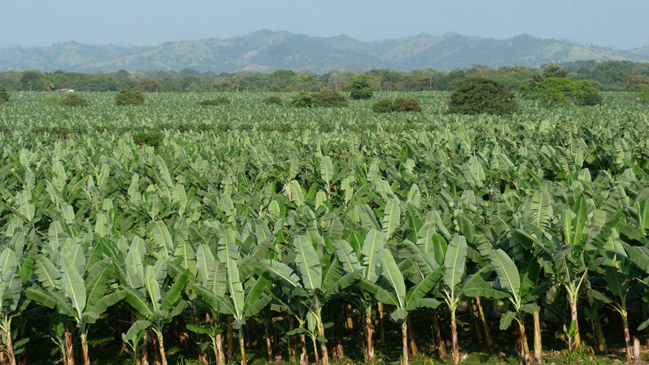

In [8]:
PIL.Image.open(str(banana[1]))

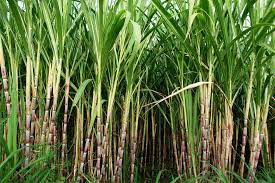

In [9]:
sugarcane = list(data_dir.glob('sugarcane/*'))
PIL.Image.open(str(sugarcane[0]))

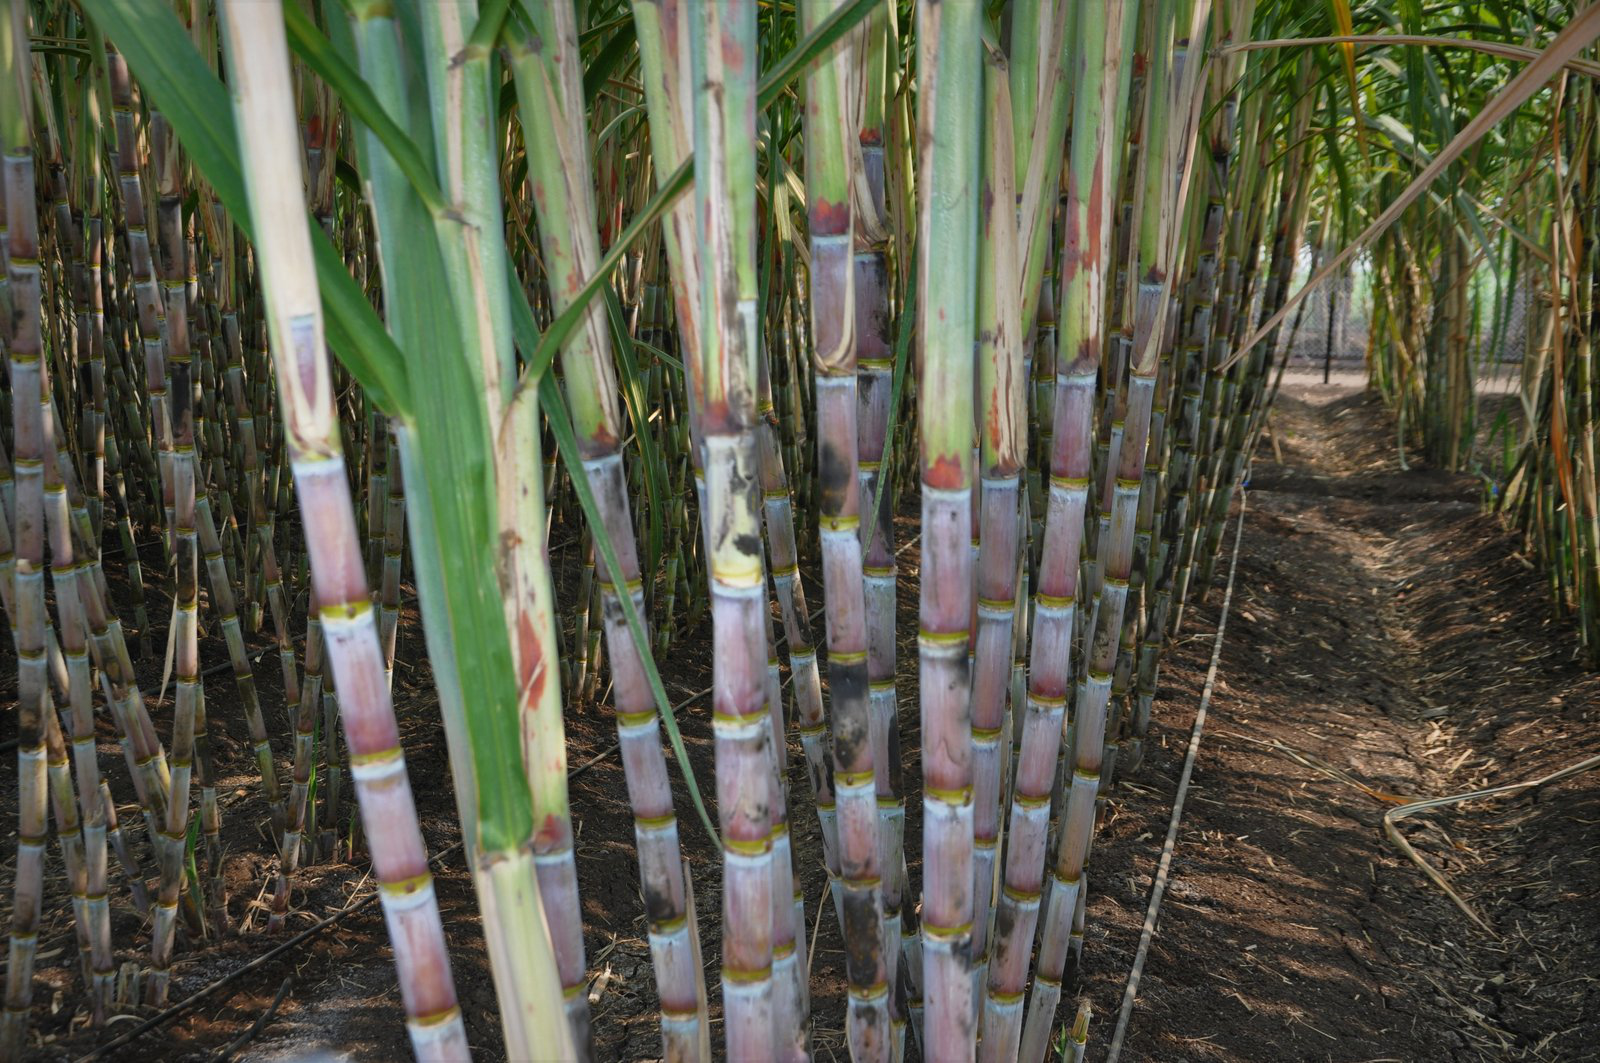

In [6]:
PIL.Image.open(str(sugarcane[1]))

In [10]:
batch_size = 32
img_height = 180
img_width = 180

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 829 files belonging to 30 classes.
Using 664 files for training.


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 829 files belonging to 30 classes.
Using 82 files for validation.


In [11]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 829 files belonging to 30 classes.
Using 82 files for validation.


In [13]:
from PIL import Image
import os

# Path to the folder containing the images
folder_path = "Agricultural-crops"  # Replace with your folder's path

supported_formats = ["JPEG", "PNG", "GIF", "BMP"]

# Iterate through the files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Check if the current item is a file
    if os.path.isfile(file_path):
        # Handle only files with supported image formats
        if any(filename.upper().endswith(image_format) for image_format in supported_formats):
            try:
                img = Image.open(file_path)
                print(f"Image format for {filename}: {img.format}")
                # Perform operations with the image as needed
                # ...

            except IOError as e:
                print(f"Error in opening {filename}: {e}")
            except ValueError as e:
                print(f"Error in processing {filename}: {e}")

        else:
            print(f"Skipping {filename} - Unsupported image format")

    else:
        print(f"Skipping {filename} - Not a file")




Skipping almond - Not a file
Skipping banana - Not a file
Skipping cardamom - Not a file
Skipping Cherry - Not a file
Skipping chilli - Not a file
Skipping clove - Not a file
Skipping coconut - Not a file
Skipping Coffee-plant - Not a file
Skipping cotton - Not a file
Skipping Cucumber - Not a file
Skipping Fox_nut(Makhana) - Not a file
Skipping gram - Not a file
Skipping jowar - Not a file
Skipping jute - Not a file
Skipping Lemon - Not a file
Skipping maize - Not a file
Skipping mustard-oil - Not a file
Skipping Olive-tree - Not a file
Skipping papaya - Not a file
Skipping Pearl_millet(bajra) - Not a file
Skipping pineapple - Not a file
Skipping rice - Not a file
Skipping soyabean - Not a file
Skipping sugarcane - Not a file
Skipping sunflower - Not a file
Skipping tea - Not a file
Skipping Tobacco-plant - Not a file
Skipping tomato - Not a file
Skipping vigna-radiati(Mung) - Not a file
Skipping wheat - Not a file


In [14]:
# Create the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 829 files belonging to 30 classes.
Using 664 files for training.


In [15]:
class_names = train_ds.class_names
print(class_names)

['Cherry', 'Coffee-plant', 'Cucumber', 'Fox_nut(Makhana)', 'Lemon', 'Olive-tree', 'Pearl_millet(bajra)', 'Tobacco-plant', 'almond', 'banana', 'cardamom', 'chilli', 'clove', 'coconut', 'cotton', 'gram', 'jowar', 'jute', 'maize', 'mustard-oil', 'papaya', 'pineapple', 'rice', 'soyabean', 'sugarcane', 'sunflower', 'tea', 'tomato', 'vigna-radiati(Mung)', 'wheat']


Found 829 images belonging to 30 classes.


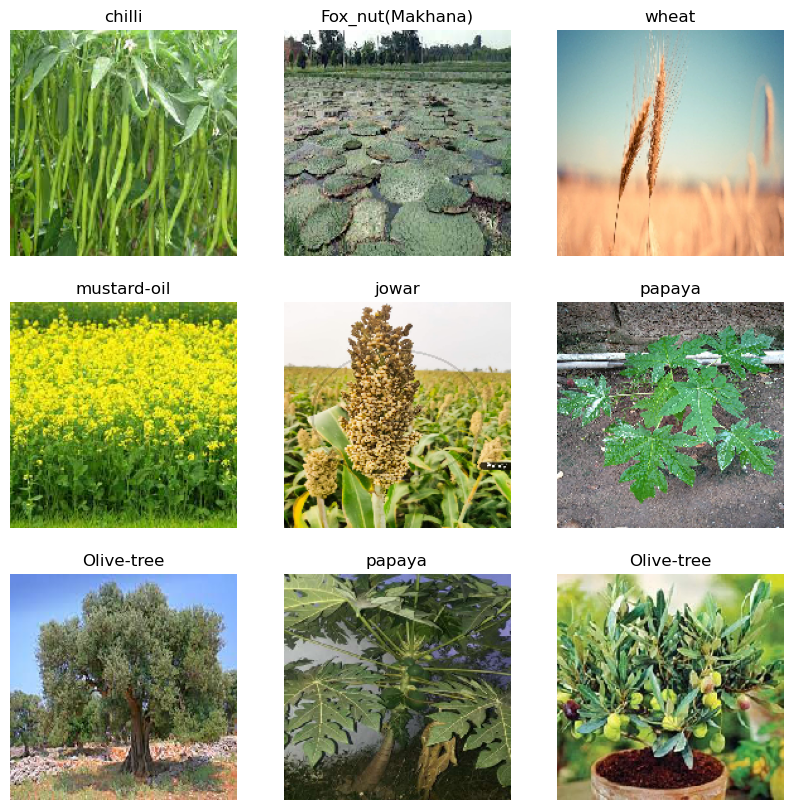

In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your folder paths and class names
train_folder = "Agricultural-crops"
class_names = ['Cherry', 'Coffee-plant', 'Cucumber', 'Fox_nut(Makhana)', 'Lemon', 'Olive-tree', 'Pearl_millet(bajra)', 'Tobacco-plant', 'almond', 'banana', 'cardamom', 'chilli', 'clove', 'coconut', 'cotton', 'gram', 'jowar', 'jute', 'maize', 'mustard-oil', 'papaya', 'pineapple', 'rice', 'soyabean', 'sugarcane', 'sunflower', 'tea', 'tomato', 'vigna-radiati(Mung)', 'wheat']  # Replace with your actual class names

# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Flow images from the specified folder
train_ds = datagen.flow_from_directory(
    train_folder,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for more than two classes
)

# Display the images
# Display the images
# Display the images
plt.figure(figsize=(10, 10))
images, labels = next(train_ds)
for i in range(min(9, len(images))):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    if i < len(labels):
        label_index = tf.argmax(labels[i]).numpy()
        plt.title(class_names[label_index])
    plt.axis("off")


plt.show()


In [17]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32, 30)


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your folder paths and class names
train_folder = "Agricultural-crops"
class_names = ['Cherry', 'Coffee-plant', 'Cucumber', 'Fox_nut(Makhana)', 'Lemon', 'Olive-tree', 'Pearl_millet(bajra)', 'Tobacco-plant', 'almond', 'banana', 'cardamom', 'chilli', 'clove', 'coconut', 'cotton', 'gram', 'jowar', 'jute', 'maize', 'mustard-oil', 'papaya', 'pineapple', 'rice', 'soyabean', 'sugarcane', 'sunflower', 'tea', 'tomato', 'vigna-radiati(Mung)', 'wheat']  # Replace with your actual class names

# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Flow images from the specified folder
train_ds = datagen.flow_from_directory(
    train_folder,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for more than two classes
)

# Convert the DirectoryIterator to a Dataset object
train_ds = tf.data.Dataset.from_generator(
    lambda: train_ds,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 180, 180, 3], [None])
)

# Apply the shuffle and prefetch operations
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE)


Found 829 images belonging to 30 classes.


In [19]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))